# Getting started

This page describes a simple ModelSkill workflow when model results and
observations are already matched. See [workflow page](workflow.qmd) for
a more elaborate workflow.

## Installation

``` bash
pip install modelskill
```

## Skill assessment

The simplest use-case for skill assessment is when you have a dataset of
matched model results and observations in tabular format.

In [1]:
import pandas as pd
import modelskill as ms
df = pd.read_csv("../data/Vistula/sim1/6158100.csv", parse_dates=True, index_col="Date")
df.head()

In [2]:
cmp = ms.from_matched(df, obs_item="Qobs", mod_items="Qsim", quantity=ms.Quantity("Discharge", "m3/s"))
cmp

<Comparer>
Quantity: Discharge [m3/s]
Observation: Qobs, n_points=3653
Model(s):
0: Qsim

A time series plot is a common way to visualize the comparison.

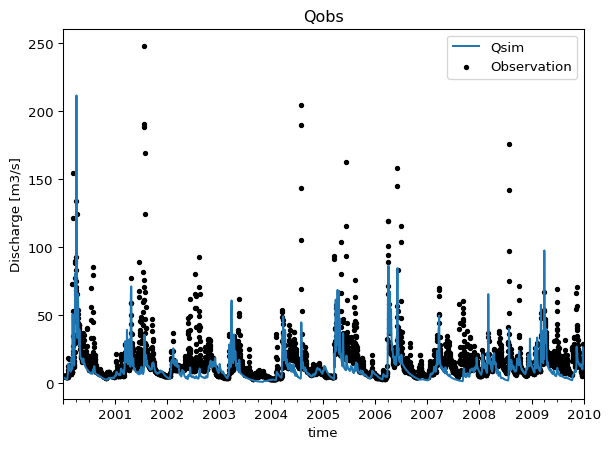

In [3]:
cmp.plot.timeseries()

Another more quantitative way to analyze the compared data is to use a
scatter plot, which optionally includes a skill table ([Definition of
the metrics](../api/metrics.html#modelskill.metrics)).

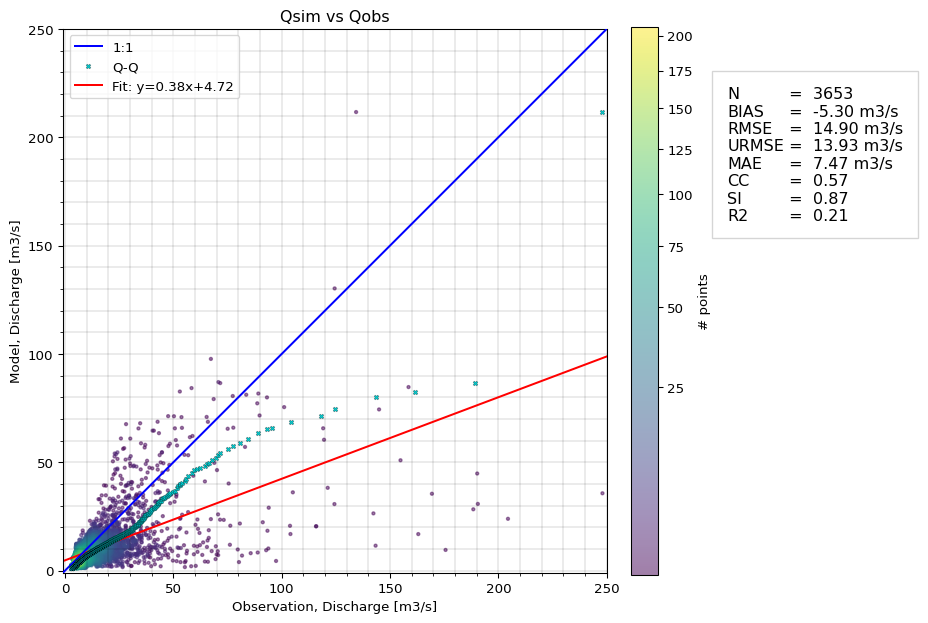

In [4]:
cmp.plot.scatter(skill_table=True)

The skill table can also be produced in tabular format, including
specifing other metrics.

In [5]:
cmp.skill(metrics=["bias", "mae", "rmse", "kge", "si"])